# **House prices study of the Ames, Iowa area.**

## Objectives

* Answer business requirement 1:
    * The client is interested to understand the average sale price of houses in the Ames, Iowa area according to their respective features. 

## Inputs

* outputs/datasets/collection/house_prices_ames_iowa_cleaned.csv

## Outputs

* Generate code that answers business requirement 1 and can be used to build the Streamlit App 


---

## Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/housing-price-data-ml/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/housing-price-data-ml'

# Load Data

In [4]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/house_prices_ames_iowa_cleaned.csv"))
df.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,0.0,460,RFn,...,80.0,0.0,0,8,6,1262,0.0,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,0.0,2001,2002,223500


---

# Data Exploration

We are interested to get more familiar with the dataset, check variable type and distribution, missing levels and what these variables mean in a business context

In [5]:
from pandas_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Correlation Study

Observing how many variables are categorical:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1460 non-null   float64
 2   BedroomAbvGr   1460 non-null   float64
 3   BsmtExposure   1460 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1460 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  1460 non-null   float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1460 non-null   object 
 10  GarageYrBlt    1460 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1460 non-null   float64
 15  MasVnrArea     1460 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

Categorical features:
- BsmtExposure
- BsmtFinType1
- GarageFinish
- KitchenQual

This transformation helps the correlation analysis, since the correlation methods need the variables to be numbers, and OneHotEncoder does that.

In [7]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df_ohe = encoder.fit_transform(df)
print(df_ohe.shape)
df_ohe.head(3)

(1460, 40)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,LotArea,...,BsmtFinType1_None,BsmtFinType1_LwQ,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Fin,GarageFinish_None,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Ex,KitchenQual_Fa
0,856,854.0,3.0,706,150,0.0,548,2003.0,1710,8450,...,0,0,1,0,0,0,1,0,0,0
1,1262,0.0,3.0,978,284,0.0,460,1976.0,1262,9600,...,0,0,1,0,0,0,0,1,0,0
2,920,866.0,3.0,486,434,0.0,608,2001.0,1786,11250,...,0,0,1,0,0,0,1,0,0,0


I use `spearman` and `pearson` methods, and investigate the top 10 correlations
* I know this command returns a pandas series and the first item is the correlation between SalePrice and SalePrice, which happens to be 1, so I exclude that with `[1:]`
* I sort values considering the absolute value, by setting `key=abs`

In [8]:
corr_spearman = df_ohe.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual       0.809829
GrLivArea         0.731310
YearBuilt         0.652682
GarageArea        0.649379
TotalBsmtSF       0.602725
KitchenQual_TA   -0.581803
1stFlrSF          0.575408
YearRemodAdd      0.571159
GarageYrBlt       0.563256
KitchenQual_Gd    0.478583
Name: SalePrice, dtype: float64

We do the same for `pearson`

In [9]:
corr_pearson = df_ohe.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual       0.790982
GrLivArea         0.708624
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
YearBuilt         0.522897
KitchenQual_TA   -0.519298
YearRemodAdd      0.507101
KitchenQual_Ex    0.504094
MasVnrArea        0.472614
Name: SalePrice, dtype: float64

I've noticed the two methods return almost the same features as highly correlated with some differences on the importance of YearBuilt and 1stFlrSF so I decided to consider the 9 top features for further analysis, since their value was above 0.50.

In [10]:
top_n = 9
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'1stFlrSF',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'KitchenQual_Ex',
 'KitchenQual_TA',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd'}

Therefore we are studying at df the following features. We will investigate if:
* A house price is higher if the first floor, garage, basement and ground living area is large.
* A house price is higher if the kitchen and overall quality is higher as our first hypotesis implies.
* A house price is higher if the year it was built or remodeled is more recent, as our second hypotesis implies.

In [11]:
vars_to_study = ['1stFlrSF',
                 'GarageArea',
                 'GarageYrBlt',
                 'GrLivArea',
                 'KitchenQual_Ex',
                 'KitchenQual_TA',
                 'OverallQual',
                 'TotalBsmtSF',
                 'YearBuilt',
                 'YearRemodAdd']
vars_to_study


['1stFlrSF',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'KitchenQual_Ex',
 'KitchenQual_TA',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd']

---

# EDA on selected variables

In [12]:
df_eda = df.filter(vars_to_study + ['SalePrice'])
df_eda.head(10)

,1stFlrSF,GarageArea,GarageYrBlt,GrLivArea,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,548,2003.0,1710,7,856,2003,2003,208500
1,1262,460,1976.0,1262,6,1262,1976,1976,181500
2,920,608,2001.0,1786,7,920,2001,2002,223500
3,961,642,1998.0,1717,7,756,1915,1970,140000
4,1145,836,2000.0,2198,8,1145,2000,2000,250000
5,796,480,1993.0,1362,5,796,1993,1995,143000
6,1694,636,2004.0,1694,8,1686,2004,2005,307000
7,1107,484,1973.0,2090,7,1107,1973,1973,200000
8,1022,468,1931.0,1774,7,952,1931,1950,129900
9,1077,205,1939.0,1077,5,991,1939,1950,118000


Import libraries to plot features and analyse it.

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

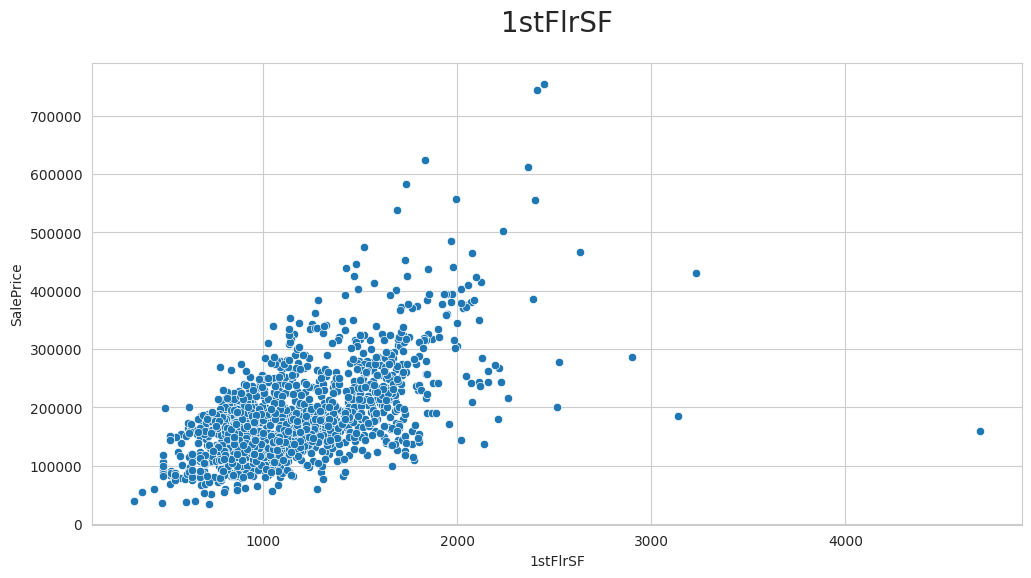

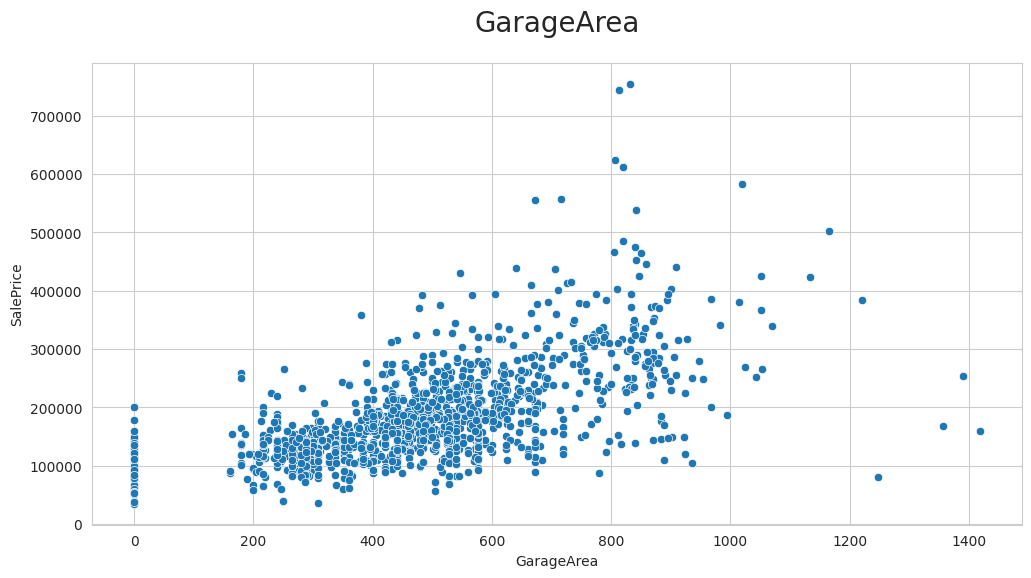

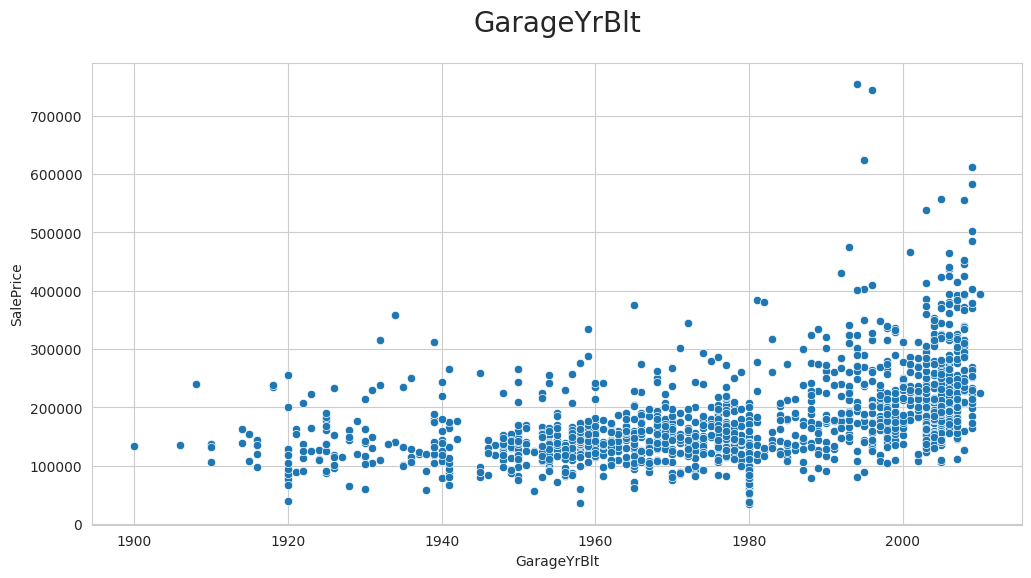

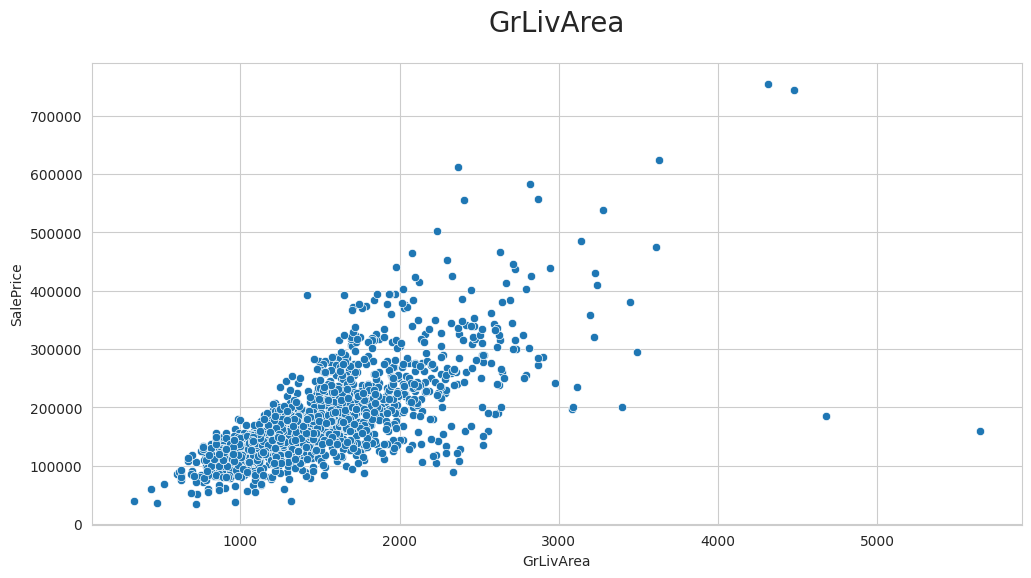

ValueError: Could not interpret value `KitchenQual_Ex` for parameter `x`

<Figure size 1200x600 with 0 Axes>

In [14]:
def scatter_plot_for_eda(df, col, target_var):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x=col, y=target_var)
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


target_var = 'SalePrice'
for col in vars_to_study:
    scatter_plot_for_eda(df_eda, col, target_var)
    print("\n\n")


---

# PPS Analysis

These custom functions are from the Code Institute learning materials, from the lesson notebook "Predictive Power Score Unit 1". I've been authorised by the owner to use it.

In [15]:
# Libraries not yet imported
import numpy as np
import ppscore as pps


def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman")
    df_corr_pearson = df.corr(method="pearson")

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(
        columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query(
        "ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold,
                 figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold,
                 figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold,
                figsize=figsize, font_annot=font_annot)


Calculate Correlations and Power Predictive Score

In [16]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%    75%    max
ppscore  552.0  0.051  0.099  0.0  0.0  0.0  0.057  0.625


Display at Heatmaps



* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



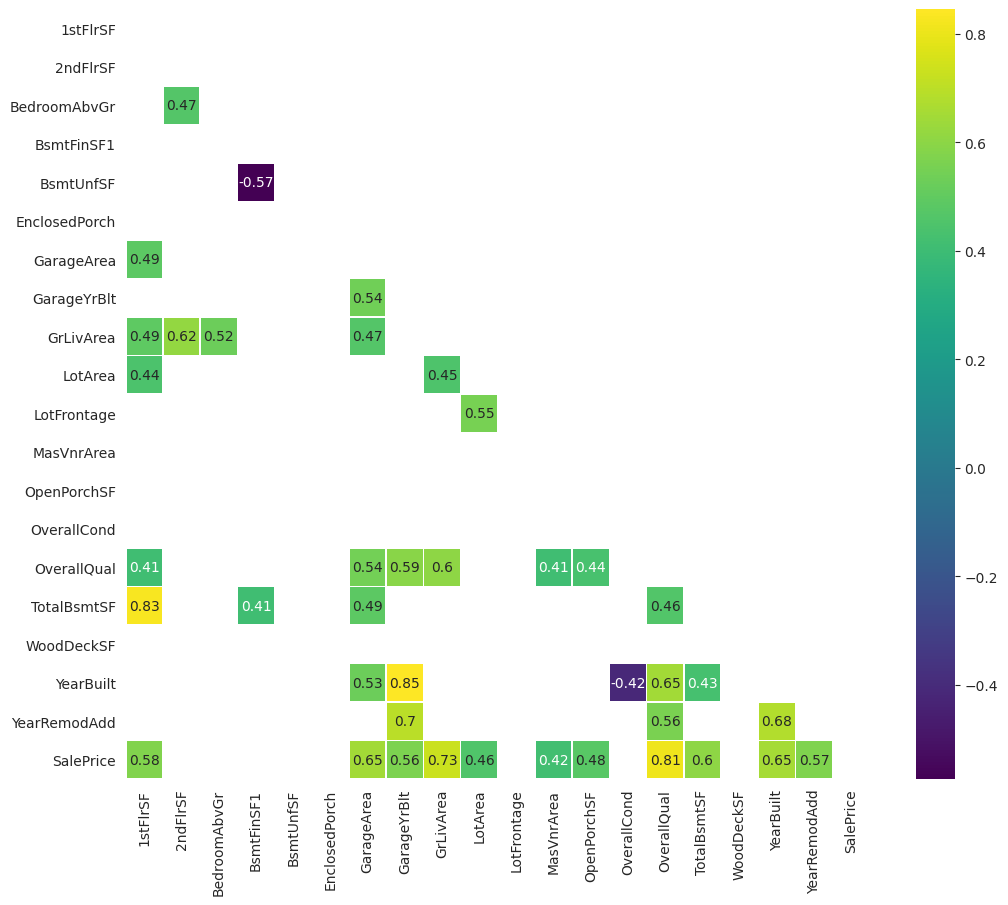



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



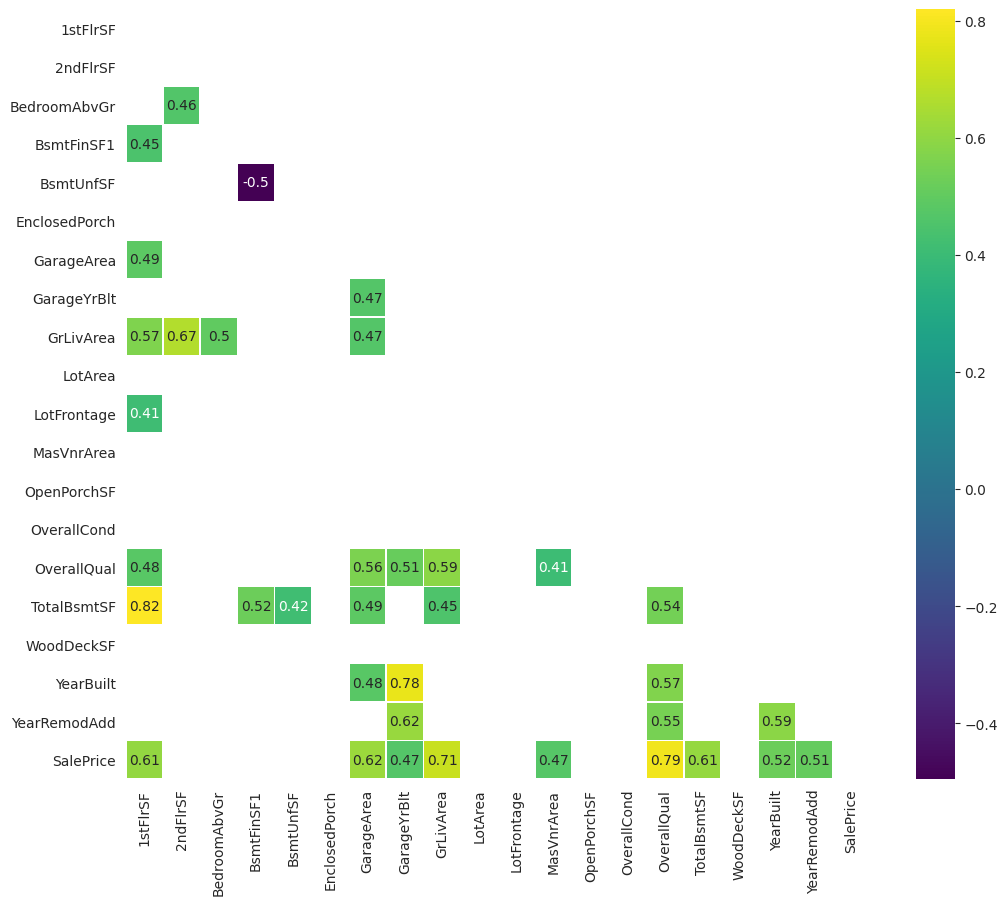



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



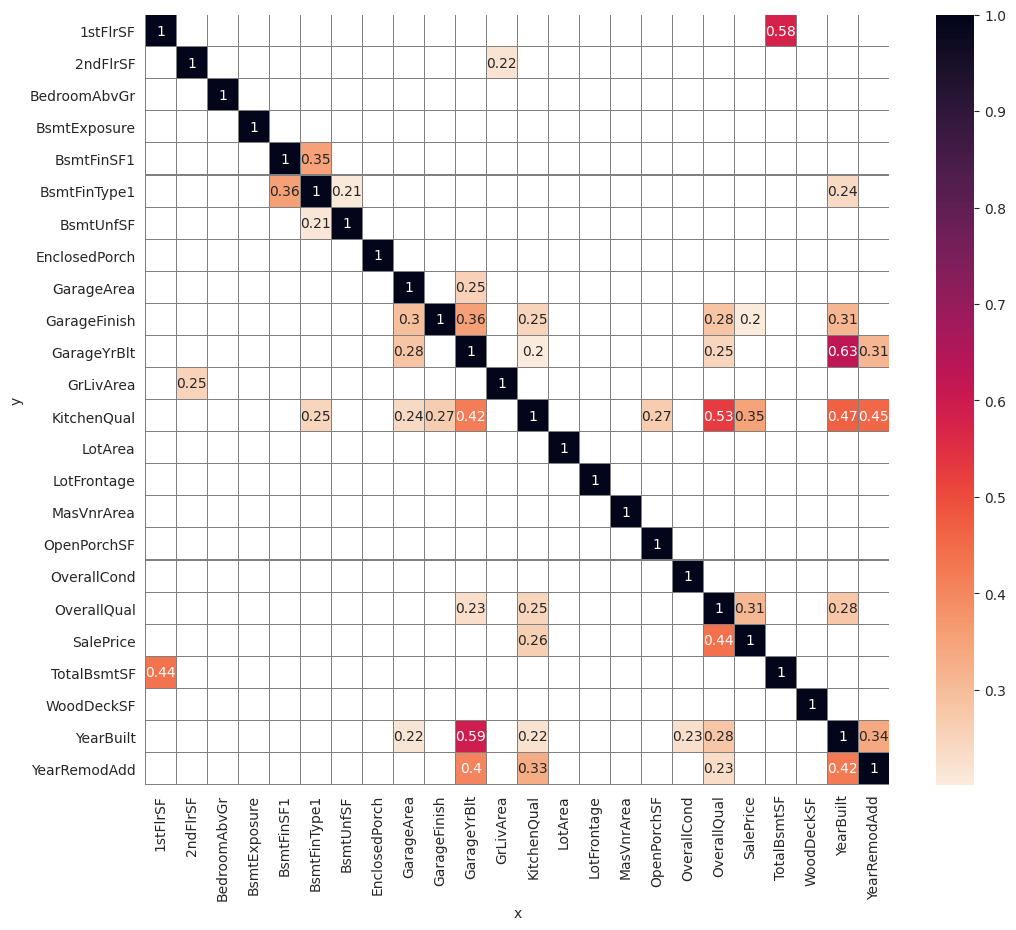

In [17]:
DisplayCorrAndPPS(df_corr_pearson=df_corr_pearson,
                  df_corr_spearman=df_corr_spearman,
                  pps_matrix=pps_matrix,
                  CorrThreshold=0.4, PPS_Threshold=0.2,
                  figsize=(12, 10), font_annot=10)


---

# Conclusions

From the analysis performed I have gathered that:
- Houses that are larger in area on various feature are also higher in value. This seems to be the strongest correlation at the moment, which was not one of the initial hypothesis.
- Houses that are in better condition and with higher quality building features are higher in value, confirming hypothesis 1.
- Houses which are newer or more recently renovated are higher in value, confirming hypothesis 2.

This findings will be the foundation for the modelling step of the process.

---

# Split Train and Test Set

In [18]:
from sklearn.model_selection import train_test_split
TrainSet, TestSet, _, __ = train_test_split(
                                        df,
                                        df['SalePrice'],
                                        test_size=0.2,
                                        random_state=0)

print(f"TrainSet shape: {TrainSet.shape} \nTestSet shape: {TestSet.shape}")

TrainSet shape: (1168, 24) 
TestSet shape: (292, 24)


Evaluate id any missing data still exists

In [19]:
def EvaluateMissingData(df):
    missing_data_absolute = df.isnull().sum()
    missing_data_percentage = round(missing_data_absolute/len(df)*100, 2)
    df_missing_data = (pd.DataFrame(
        data={"RowsWithMissingData": missing_data_absolute,
              "PercentageOfDataset": missing_data_percentage,
              "DataType": df.dtypes}
    )
        .sort_values(by=['PercentageOfDataset'], ascending=False)
        .query("PercentageOfDataset > 0")
    )

    return df_missing_data


df_missing_data = EvaluateMissingData(TrainSet)
print(f"* There are {df_missing_data.shape[0]} variables with missing data \n")
df_missing_data


* There are 0 variables with missing data 



,RowsWithMissingData,PercentageOfDataset,DataType


---

# Drop Variables

Dropping variables that have been found not having enough correlation with the target variable, with a value lower than 0.50. For further details, see notebook: 03 - House_prices_study.ipynb

In [20]:
variables_to_drop = ['2ndFlrSF',
                     'BedroomAbvGr',
                     'BsmtExposure',
                     'BsmtFinSF1',
                     'BsmtFinType1',
                     'BsmtUnfSF',
                     'EnclosedPorch',
                     'GarageFinish',
                     'LotArea',
                     'LotFrontage',
                     'MasVnrArea',
                     'OpenPorchSF',
                     'OverallCond',
                     'WoodDeckSF'
                     ]
print(f"* {len(variables_to_drop)} variables to drop \n\n"
      f"{variables_to_drop}")


* 14 variables to drop 

['2ndFlrSF', 'BedroomAbvGr', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType1', 'BsmtUnfSF', 'EnclosedPorch', 'GarageFinish', 'LotArea', 'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'OverallCond', 'WoodDeckSF']


Creating a DataFrame applying this imputation approach to the selected variables.

In [ ]:
from feature_engine.selection import DropFeatures
imputer = DropFeatures(features_to_drop=variables_to_drop)
imputer.fit(TrainSet)
df_method = imputer.transform(TrainSet)

Transforming data

In [ ]:
from feature_engine.selection import DropFeatures
imputer = DropFeatures(features_to_drop=variables_to_drop)
imputer.fit(TrainSet)

TrainSet, TestSet = imputer.transform(TrainSet) , imputer.transform(TestSet)

Evaluate if more variables need to be dealt with.

In [ ]:
EvaluateMissingData(TrainSet)

---

# Push cleaned data to Repo

In [ ]:
import os
try:
  os.makedirs(name='outputs/datasets/cleaned') # create outputs/datasets/collection folder
except Exception as e:
  print(e)


## Train Set

In [ ]:
TrainSet.to_csv("outputs/datasets/cleaned/TrainSetCleaned.csv", index=False)

## Test Set

In [ ]:
TestSet.to_csv("outputs/datasets/cleaned/TestSetCleaned.csv", index=False)

Saving files to the repository for further use in the Feature Engineering step of the process.